In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Input 
from sklearn.model_selection import train_test_split

In [3]:
def format_output(data):
  y1 = data.pop('Y1')
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2) 
  return y1, y2 

In [6]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

In [7]:
def plot_diff(y_true, y_pred, title=''):
  plt.scatter(y_true, y_pred) 
  plt.title(title) 
  plt.xlabel('True Values')
  plt.ylabel('Predictions') 
  plt.axis('equal')
  plt.axis('square')
  plt.xlim(plt.xlim())
  plt.ylim(plt.ylim())
  plt.plot([[-100, 100], [-100, 100]])
  plt.show()

In [8]:
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0, ylim)
  plt.plot(history.history[metric_name], color='blue', label=metric_name)
  plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
  plt.show()

In [9]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [11]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

In [12]:
norm_train_X = norm(train)
norm_test_X = norm(test)

In [14]:
input_layer = Input(shape = (len(train.columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

y1_output = Dense(units='1', name='y1_output')(second_dense)

third_dense = Dense(units='64', activation='relu')(second_dense)

y2_output = Dense(units='1', name='y2_output')(third_dense)

model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_3 (Dense)                (None, 128)          1152        ['input_2[0][0]']                
                                                                                                  
 dense_4 (Dense)                (None, 128)          16512       ['dense_3[0][0]']                
                                                                                                  
 dense_5 (Dense)                (None, 64)           8256        ['dense_4[0][0]']                
                                                                                            

In [15]:
optimizer= tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output':tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [17]:
history = model.fit(norm_train_X, train_Y, epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 3s 10ms/step - loss: 241.6482 - y1_output_loss: 111.6991 - y2_output_loss: 129.9492 - y1_output_root_mean_squared_error: 10.5688 - y2_output_root_mean_squared_error: 11.3995 - val_loss: 47.6286 - val_y1_output_loss: 17.4969 - val_y2_output_loss: 30.1317 - val_y1_output_root_mean_squared_error: 4.1829 - val_y2_output_root_mean_squared_error: 5.4892
Epoch 2/500
62/62 [==============================] - 0s 7ms/step - loss: 37.5916 - y1_output_loss: 13.5880 - y2_output_loss: 24.0035 - y1_output_root_mean_squared_error: 3.6862 - y2_output_root_mean_squared_error: 4.8993 - val_loss: 25.2801 - val_y1_output_loss: 11.3705 - val_y2_output_loss: 13.9096 - val_y1_output_root_mean_squared_error: 3.3720 - val_y2_output_root_mean_squared_error: 3.7296
Epoch 3/500
62/62 [==============================] - 0s 6ms/step - loss: 25.5827 - y1_output_loss: 9.9540 - y2_output_loss: 15.6286 - y1_output_root_mean_squared_error: 3.1550 - y2_output_root_mean_sq

In [18]:
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss ={}, Y1_mse={}, Y2_loss={}, Y2_mse={}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 5ms/step - loss: 0.6117 - y1_output_loss: 0.1859 - y2_output_loss: 0.4258 - y1_output_root_mean_squared_error: 0.4312 - y2_output_root_mean_squared_error: 0.6525
Loss = 0.6117027401924133, Y1_loss =0.18594497442245483, Y1_mse=0.43121337890625, Y2_loss=0.42575782537460327, Y2_mse=0.6525012254714966


5/5 [==============================] - 0s 2ms/step


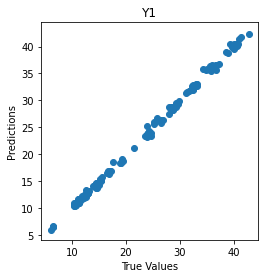

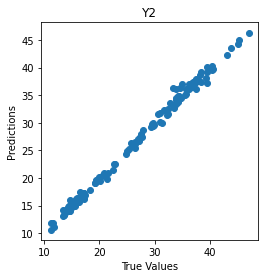

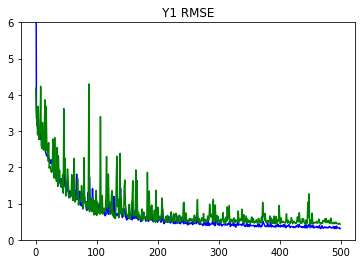

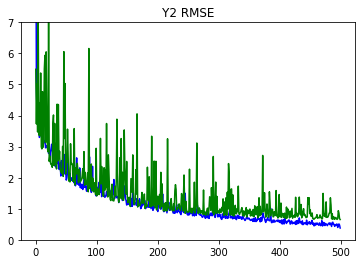

In [19]:
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2') 
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)